## Quiz

In [69]:
from bs4 import BeautifulSoup
import os
import pandas as pd

In [55]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][0:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        # strip off white space and remove comma to prep it to be an int
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',', '')
    
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
# convert a df list to a pandas dataframe
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'number_of_audience_ratings'])
df


,title,audience_score,number_of_audience_ratings
0,All Quiet on the Western Front (1930),89,17768
1,Rear Window (1954),95,149458
2,Casablanca (1942),95,355952
3,Inside Out (2015),89,133558
4,Gravity (2013),80,301261
5,Get Out (2017),87,63837
6,The Grapes of Wrath (1940),88,23954
7,All About Eve (1950),94,44564
8,Casablanca (1942),95,355952
9,Gone With the Wind (1939),93,292794


## Solution Test
Run the cell below the see if your solution is correct. If an `AssertionError` is thrown, your solution is incorrect. If no error is thrown, your solution is correct.

In [62]:
# a .pkl extension is a python pickle extension hat enabless objects to be serialized to files on disk and deserialized back into the program at runtime. 
df_solution = pd.read_pickle('df_solution.pkl')
df_solution
df.sort_values('title', inplace = True)
df.reset_index(inplace = True, drop = True)
df_solution.sort_values('title', inplace = True)
df_solution.reset_index(inplace = True, drop = True)
# Shape match will be different as df has 25 rows and df_solution.pkl has 100 rows
pd.testing.assert_frame_equal(df, df_solution)

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (25, 3)
[right]: (100, 3)

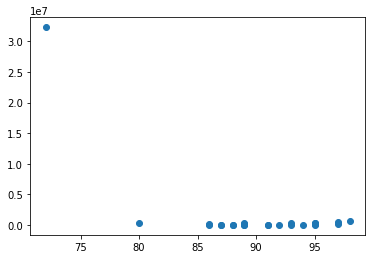

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.audience_score, df.number_of_audience_ratings)

In [4]:
with open('rt_html/et_the_extraterrestrial.html') as file:
    soup = BeautifulSoup(file, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
  <script src="//cdn.optimizely.com/js/594670329.js">
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc" name="google-site-verification"/>
  <meta content="034F16304017CA7DCF45D43850915323" name="msvalidate.01"/>
  <link href="https://staticv2-4.rottentomatoes.com/static/images/iphone/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="https://staticv2-4.rottentomatoes.com/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://staticv2-4.rottentomatoes.com/static/styles/css/rt_main.css" rel="stylesheet"/>
  <script id="jsonLdSchema" type="application/ld+j

In [5]:
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [7]:
soup.find('title').get_text()

'E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes'

In [8]:
soup.find('title').contents

['E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes']

In [11]:
len(' - Rotten Tomatoes') # 18 characters

# slice from 0 to -18th character to strip off len(' - Rotten Tomatoes')
soup.find('title').contents[0][0:-len(' - Rotten Tomatoes')]


'E.T. The Extra-Terrestrial\xa0(1982)'

### Udacity Requests
- How to download a file from the internet and put into a txt

In [64]:
import requests
import os

folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt'
response = requests.get(url)
response


<Response [200]>

In [80]:
# response.content
# BeautifulSoup(response.content, 'html.parser')

# join the folder name 'ebert_reviews' to the last value in the url which is '1-the-wizard-of-oz-1939-film.txt'
# then we write as binary into the file we created named 'file'
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


# check the folder directory to be sure the file was written into and saved
os.listdir(folder_name)
    

['1-the-wizard-of-oz-1939-film.txt']

In [81]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [84]:
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
os.listdir(folder_name)
len(os.listdir(folder_name))


88

In [88]:
# glob pattern - wild card characters
import glob

for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        print(file.read())
        break

Dunkirk (2017)
http://www.rogerebert.com/reviews/dunkirk-2017
Lean and ambitious, unsentimental and bombastic, overwhelmingly guy-centric, Christopher Nolan's World War II epic "Dunkirk" showcases the best and worst of the director's tendencies. The best win out and the worst recede in memory when you think back on the experience—provided that you want to remember "Dunkirk," a movie that's supposed to be grueling and succeeds. Less of a war film and more of a disaster (or survival) picture, it's an ensemble work that chronicles the evacuation of British soldiers who got trapped in the harbor and on the beaches of Dunkirk, France, in late May and early June of 1940, with the Germans, who had driven Allied forces practically out to sea, closing in for one last sweep.

If you were to make a list of every phobia you can think of, you'd have to tick off a lot of boxes after seeing this film. Fear of heights, fire, drowning, confined spaces, darkness, abandonment—you name it, it's represente

In [92]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
#         use readline to read the first line of evert file that ends in .txt and use [:-1] or .strip() to strip off empty spaces
        print(file.readline()[:-1])

Dunkirk (2017)
Army of Shadows (L'Armée des ombres) (1969)
Alien (1979)
The Bride of Frankenstein (1935)
The 400 Blows (Les Quatre cents coups) (1959)
Manchester by the Sea (2016)
Mad Max: Fury Road (2015)
Wonder Woman (2017)
Bicycle Thieves (Ladri di biciclette) (1949)
Laura (1944)
Toy Story (1995)
On the Waterfront (1954)
Toy Story 3 (2010)
Tokyo Story (Tôkyô monogatari) (1953)
La Grande illusion (Grand Illusion) (1938)
The Last Picture Show (1971)
Rear Window (1954)
Gone With the Wind (1939)
A Streetcar Named Desire (1951)
Pinocchio (1940)
King Kong (1933)
Arrival (2016)
Dr. Strangelove Or How I Learned to Stop Worrying and Love the Bomb (1964)
Argo (2012)
A Hard Day's Night (1964)
Selma (2015)
Hell or High Water (2016)
Gravity (2013)
Logan (2017)
Metropolis (1927)
The Big Sick (2017)
Rosemary's Baby (1968)
12 Angry Men (Twelve Angry Men) (1957)
Get Out (2017)
E.T. The Extra-Terrestrial (1982)
Zootopia (2016)
The Maltese Falcon (1941)
Up (2009)
The Wizard of Oz (1939)
Apocalypse Now

In [100]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        df_list.append({'title': title, 'review_url': review_url, 'review_text': review_text})

df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])
df
       


,title,review_url,review_text
0,All Quiet on the Western Front (1930),NaN,NaN
1,Rear Window (1954),NaN,NaN
2,Casablanca (1942),NaN,NaN
3,Inside Out (2015),NaN,NaN
4,Gravity (2013),NaN,NaN
5,Get Out (2017),NaN,NaN
6,The Grapes of Wrath (1940),NaN,NaN
7,All About Eve (1950),NaN,NaN
8,Casablanca (1942),NaN,NaN
9,Gone With the Wind (1939),NaN,NaN


In [102]:
# Get images for the movies from wikipedia using wptools
# Use jupyter pip extra to install wptools
import wptools



ModuleNotFoundError: No module named 'wptools'

In [115]:
!type python

python is /anaconda3/bin/python


In [116]:
!type ls

ls is /bin/ls


In [117]:
!type type

type is a shell builtin


In [118]:
!type -a python


python is /anaconda3/bin/python
python is /anaconda3/bin/python
python is /usr/local/bin/python
python is /usr/bin/python


In [119]:
!type -a conda

conda is /anaconda3/bin/conda
conda is /anaconda3/bin/conda
conda is /anaconda3/condabin/conda


In [120]:
!type -a pip


pip is /anaconda3/bin/pip
pip is /anaconda3/bin/pip
pip is /Library/Frameworks/Python.framework/Versions/3.6/bin/pip
pip is /usr/local/bin/pip


In [121]:
import sys
sys.path

['/Users/jkuti/udacity',
 '/anaconda3/lib/python37.zip',
 '/anaconda3/lib/python3.7',
 '/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/anaconda3/lib/python3.7/site-packages',
 '/anaconda3/lib/python3.7/site-packages/aeosa',
 '/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/jkuti/.ipython']

In [122]:
import numpy
numpy.__path__

['/anaconda3/lib/python3.7/site-packages/numpy']

In [123]:
paths = !type -a python
for path in set(paths):
    path = path.split()[-1]
    print(path)
    !{path} -c "import sys; print(sys.path)"
    print()

/anaconda3/bin/python
['', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/aeosa']

/usr/bin/python
['', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Users/jkuti/Library/Python/2.7/lib/python/site-packages', '/Library/Python/2.7/site-packa

In [124]:
!conda env list

# conda environments:
#
base                  *  /anaconda3



In [126]:
!type python
sys.executable

python is /anaconda3/bin/python


'/anaconda3/bin/python'

In [103]:
# How to install with pip in jupyter notebook
# import sys
# !conda install --yes --prefix {sys.prefix} wptools
import sys
!{sys.executable} -m pip install wptools

  Using cached https://files.pythonhosted.org/packages/e2/5c/0d8af5532e44477edeb3dac81d3a611ea75827a18b6b4068c3cc2188bfe5/wptools-0.4.17-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/20/de2b458ef434713053dd83209a03a5431ebe0527c8e14d9ae7838ff67d8a/html2text-2018.1.9-py3-none-any.whl


In [111]:
# wptools API
import wptools
page = wptools.page('Mahatma_Ghandi')
page.get_query()

en.wikipedia.org (query) Mahatma_Ghandi
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Geor...
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|New_Delhi)
en.wikipedia.org (query) Mahatma Gandhi (&plcontinue=19379|0|Veganz)
en.wikipedia.org (imageinfo) File:Mahatma-Gandhi, studio, 1931.jpg
Mahatma Gandhi (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(12)> M K Gandhi, Mohandas Gandhi, Bapu, Gandhi, M...
  assessments: <dict(10)> Biography, Politics, Alternative Views, ...
  description: <str(67)> pre-eminent leader of Indian nationalism ...
  extext: <str(3208)> **Mohandas Karamchand Gandhi** ( ; Hindustan...
  extract: <str(3533)> <p class="mw-empty-elt"></p><p class="mw-em...
  image: <list(8)> {'kind': 'query-pageimage', 'file': 'File:Mahat...
  label: Mahatma Gandhi
  length: 273,851
  links: <list(1603)> -ji, 10 Janpath, 14th Dalai Lama, 1915 Singa...
  modified: <dict(1)> page
  pageid: 19379
  random: Nutbush City Limits
  redirects: <list(5

In [112]:
page.get()

www.wikidata.org (wikidata) Q1001
www.wikidata.org (labels) P4180|P3029|P4200|P1005|P1315|Q11774202...
www.wikidata.org (labels) Q6419912|P3430|P1207|P31|P1417|P2605|Q1...
www.wikidata.org (labels) P3221|Q1860|P18|P3222|P910|Q1568|Q12337...
www.wikidata.org (labels) P4862|P1441|P691|P3630|Q9441|P103|P6573...
www.wikidata.org (labels) P1816|Q1381516|P1017|P22|Q6581097|Q1724...
+ query results in cache
en.wikipedia.org (parse) 19379
en.wikipedia.org (restbase) /page/summary/Mahatma Gandhi
en.wikipedia.org (imageinfo) File:Portrait Gandhi.jpg|File:Mahatm...
Mahatma Gandhi (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(12)> Mahatma Mohandas Karamchand Gandhi, M. K. Ga...
  assessments: <dict(10)> Biography, Politics, Alternative Views, ...
  claims: <dict(149)> P27, P19, P20, P26, P157, P103, P69, P140, P...
  description: <str(67)> Pre-eminent leader of Indian nationalism ...
  exhtml: <str(527)> <p><b>Mohandas Karamchand Gandhi</b> was an I...
  exrest: <str(492)> Mohandas K

In [113]:
# accessing the image attribute to return images 
page.data['image']

[{'kind': 'query-pageimage',
  'file': 'File:Mahatma-Gandhi, studio, 1931.jpg',
  'orig': 'Mahatma-Gandhi,_studio,_1931.jpg',
  'timestamp': '2019-02-26T13:14:24Z',
  'size': 3250029,
  'width': 2620,
  'height': 3270,
  'url': 'https://upload.wikimedia.org/wikipedia/commons/7/7a/Mahatma-Gandhi%2C_studio%2C_1931.jpg',
  'descriptionurl': 'https://commons.wikimedia.org/wiki/File:Mahatma-Gandhi,_studio,_1931.jpg',
  'descriptionshorturl': 'https://commons.wikimedia.org/w/index.php?curid=76882768',
  'title': 'File:Mahatma-Gandhi, studio, 1931.jpg',
  'metadata': {'DateTime': {'value': '2019-02-26 13:14:24',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'ObjectName': {'value': 'Mahatma-Gandhi, studio, 1931',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'CommonsMetadataExtension': {'value': 1.2,
    'source': 'extension',
    'hidden': ''},
   'Categories': {'value': 'Files uploaded by Yann Forget|Mohandas K. Gandhi in 1931|Mohandas K. Gandhi in England|PD-1996|PD 

In [114]:
page.data['image'][0]['url']

'https://upload.wikimedia.org/wikipedia/commons/7/7a/Mahatma-Gandhi%2C_studio%2C_1931.jpg'

In [ ]:
# Download images using PIL
import requests
from PIL import Image
from io import BytesIO

r = requests.get(url)
i = Image.open(BytesIO(r.content))